In [1]:
import numpy as np
from shapely.geometry import Point, Polygon
from shapely import affinity as af
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import display
import time
import imageio
from pathlib import Path

from ActionController import ActionController

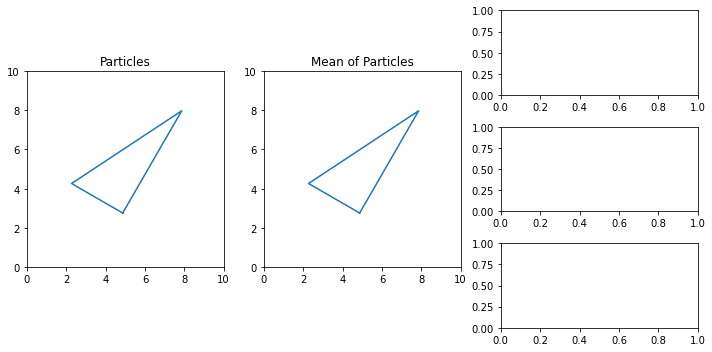

         676558 function calls (653794 primitive calls) in 0.819 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      889    0.062    0.000    0.062    0.000 ffi.py:111(__call__)
     2096    0.029    0.000    0.043    0.000 inspect.py:2889(_bind)
       64    0.019    0.000    0.019    0.000 {method 'read' of '_io.BufferedReader' objects}
     1179    0.018    0.000    0.018    0.000 {built-in method __new__ of type object at 0x1045c46e8}
     4604    0.012    0.000    0.012    0.000 {built-in method numpy.array}
    54329    0.011    0.000    0.015    0.000 {built-in method builtins.isinstance}
        1    0.010    0.010    0.452    0.452 StateEstimator.py:161(reset_particles)
     1196    0.010    0.000    0.010    0.000 {built-in method posix.lstat}
       45    0.010    0.000    0.010    0.000 {built-in method io.open_code}
     2368    0.010    0.000    0.010    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     

In [2]:
# World
# shape = Polygon([[0, 0], [6, 0], [6, 1],[0, 1], [0, 0]]) # rectangle
shape = Polygon([[0, 0], [6, 0], [0, 3], [0, 0]]) # triangle
# Center shape
shape
x = 5
y = 5
theta = np.pi/3
map_size = 10, 10

# ParticleFilter
num_particles = 1000

# Experiment
lookahead_depth = 1 ########################################################################## important shit right here
discount = 0.9

action_controller = ActionController(
    shape, x, y, theta, map_size, 
    num_particles, 
    lookahead_depth, discount, 
)

# Simulation
max_iterations = 1000

# Stopping criteria
# Mean thresholds
mean_xy_dif = 1
mean_theta_dif = np.pi/8
# Standard deviation thresholds
std_xy_threshold = 2
std_theta_threshold = np.pi/8


# Visuals

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])

action_controller.world.plot(ax1)
action_controller.world.plot(ax2)
ax1.set_title('Particles')
ax2.set_title('Mean of Particles')
fig.tight_layout()

In [4]:
%%prun

# Run
iteration = 0
start_time = time.perf_counter()
while iteration < 5:
    iteration += 1
    action_controller.tick()
    
    # Visuals
    
    s = ax1.scatter(*action_controller.previous_action, c='r')
    q = action_controller.particle_filter.draw_particles(ax1)
    ax3.clear(); ax4.clear(); ax5.clear();
    h1, h2, h3 = action_controller.particle_filter.draw_histogram(ax3, ax4, ax5)

    x,y,t = action_controller.particle_filter.get_state() # access estimated state
    q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
    display.display(fig)
    display.clear_output(wait=True)
    
    fig.suptitle(f"iteration {iteration}")
#     fig.savefig(f"SDM sim - 3.7.2021 - lookahead_depth={lookahead_depth}/iteration={iteration if iteration >= 10 else '0' + str(iteration)}.png", format='png')
    
    s.remove()
    q.remove()
    q2.remove()
    
    if iteration == max_iterations:
        break

end_time = time.perf_counter()
duration = end_time - start_time
print(duration)
# np.save(f"SDM sim entropies - 3.8.2021 - lookahead_depth={lookahead_depth}, duration={duration:.2f} sec.npy", np.array(action_controller.entropies))
# np.save(f"SDM sim costs - 3.8.2021 - lookahead_depth={lookahead_depth}, duration={duration:.2f} sec.npy", np.array(action_controller.costs))


40.367026693
 

         44593810 function calls (43433111 primitive calls) in 40.370 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  1570000    2.791    0.000    4.131    0.000 predicates.py:23(__call__)
   210000    2.566    0.000   18.292    0.000 {built-in method shapely.speedups._speedups.affine_transform}
   415000    2.055    0.000    2.055    0.000 {method 'normal' of 'numpy.random.mtrand.RandomState' objects}
  1708206    1.757    0.000    1.757    0.000 base.py:224(empty)
  1150000    1.603    0.000    5.221    0.000 base.py:696(is_empty)
  1475000    1.366    0.000    1.366    0.000 base.py:69(geometry_type_name)
901060/100    1.302    0.000    5.500    0.055 copy.py:128(deepcopy)
  7343060    1.099    0.000    1.099    0.000 base.py:261(_geom)
   210000    1.018    0.000    1.520    0.000 polygon.py:500(geos_polygon_from_py)
   155005    0.981    0.000    1.310    0.000 predicates.py:11(__call__)
   215000    0.976    0.000  

### Make figures

In [ ]:
lookahead_depth = 2
gif_path = f"SDM gif slow - 3.7.2021 - lookahead_depth={lookahead_depth}.gif"
image_dir = Path(f"SDM sim - 3.7.2021 - lookahead_depth={lookahead_depth}")
with imageio.get_writer(gif_path, mode='I', fps=5) as writer:
    for image_path in image_dir.iterdir():
        writer.append_data(imageio.imread(image_path))


In [ ]:
entropies_lookahead_depth_0 = np.load("SDM sim entropies - 3.7.2021 - lookahead_depth=0, duration=83.45 sec.npy")
entropies_lookahead_depth_1 = np.load("SDM sim entropies - 3.7.2021 - lookahead_depth=1, duration=394.70 sec.npy")
entropies_lookahead_depth_2 = np.load("SDM sim entropies - 3.7.2021 - lookahead_depth=2, duration=7152.99 sec.npy")
costs_lookahead_depth_0 = np.load("SDM sim costs - 3.7.2021 - lookahead_depth=0, duration=83.45 sec.npy")
costs_lookahead_depth_1 = np.load("SDM sim costs - 3.7.2021 - lookahead_depth=1, duration=394.70 sec.npy")
costs_lookahead_depth_2 = np.load("SDM sim costs - 3.7.2021 - lookahead_depth=2, duration=7152.99 sec.npy")

costs_lookahead_depth_0 = np.cumsum(costs_lookahead_depth_0)
costs_lookahead_depth_1 = np.cumsum(costs_lookahead_depth_1)
costs_lookahead_depth_2 = np.cumsum(costs_lookahead_depth_2)

fig, axs = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(16, 8))
# fig.suptitle("Entropies and Costs", fontsize=24)

for col, ax in enumerate(axs[0]):
    ax.set_title(f"Lookahead depth {col}", fontsize=16)
    ax.tick_params(labelsize=12)
for col, ax in enumerate(axs[1]):
    ax.set_xlabel(f"iterations", fontsize=16)
    ax.tick_params(labelsize=12)

axs[0, 0].set_ylabel("entropies", rotation="vertical", fontsize=16)
axs[1, 0].set_ylabel("costs", rotation="vertical", fontsize=16)

axs[0, 0].plot(entropies_lookahead_depth_0, 'co')
axs[0, 1].plot(entropies_lookahead_depth_1, 'co')
axs[0, 2].plot(entropies_lookahead_depth_2, 'co')
axs[1, 0].plot(costs_lookahead_depth_0, color='cornflowerblue', marker='o')
axs[1, 1].plot(costs_lookahead_depth_1, color='cornflowerblue', marker='o')
axs[1, 2].plot(costs_lookahead_depth_2, color='cornflowerblue', marker='o')

fig.savefig(f"SDM composite panel of entropy and cost.png")

# Tim's work below

In [ ]:
# particle_filter_example.ipynb
# February 16, 2021
# Tim Player playert@oregonstate.edu

In [1]:
from shapely.geometry import Point, Polygon
from StateEstimator import ParticleFilter
from World import World
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from IPython import display
import time

### Define a 2D World containing an object.

In [2]:
# Define the shape, location, and angle of the object.
shape = Polygon([[0, 0], [6, 0], [6, 1],[0, 1], [0, 0]])
x = 5
y = 5
theta = np.pi/6

# Create a World object to store the map and do measurements.
map_size = (10,10) 
w = World(shape, x, y, theta, map_size)

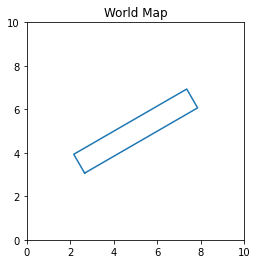

In [3]:
fig, ax = plt.subplots()
w.plot(ax)

### Run particle filter, measuring randomly

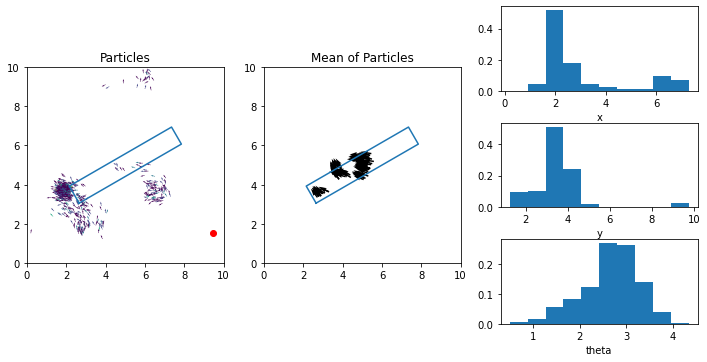

In [ ]:
# Make a particle  filter
n = 500 # run for n steps.
pf = ParticleFilter(shape, 1000, map_size)

# Set up two plots
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])

w.plot(ax1)
w.plot(ax2)
ax1.set_title('Particles')
ax2.set_title('Mean of Particles')
fig.tight_layout()

rand_entropies = []
# Repeatedly update the particle filter, measuring randomly.
for i in range(n):
    # select random measurement
    x = np.random.uniform(0,map_size[0])
    y = np.random.uniform(0,map_size[1])
    
    # update particle filter with measurement
    z = w.measure(x, y)
    pf.update(z)
    rand_entropies.append(pf.get_entropy())
    
    # Plot
    s = ax1.scatter(z[0], z[1], c='r')
    q = pf.draw_particles(ax1)
    ax3.clear(); ax4.clear(); ax5.clear();
    h1, h2, h3 = pf.draw_histogram(ax3, ax4, ax5)
    
    x,y,t = pf.get_state() # access estimated state
    q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
    display.display(fig)
    display.clear_output(wait=True)
    if i != n-1:
        q.remove()
        s.remove()

In [ ]:
plt.plot(rand_entropies)

### Run particle filter, prompting user for input

X,Y coordinate to measure: ii


could not convert string to float: 'ii'


KeyboardInterrupt: Interrupted by user

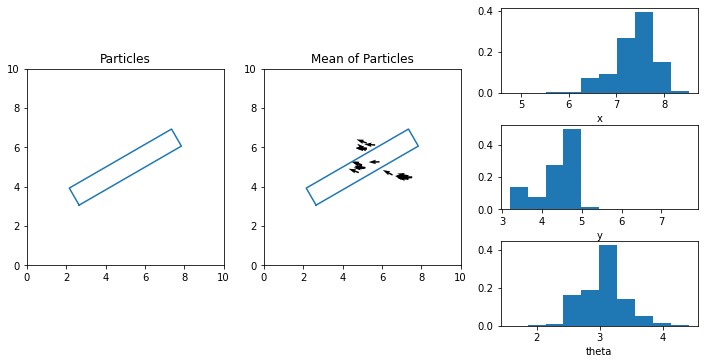

In [6]:
# Make a particle  filter
pf = ParticleFilter(shape, 1000, map_size)

# Set up two plots
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(nrows=3, ncols=3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])

w.plot(ax1)
w.plot(ax2)
ax1.set_title('Particles')
ax2.set_title('Mean of Particles')
fig.tight_layout()

# Repeatedly update the particle filter, measuring at user-defined locations.
while(True):
    # select random measurement
    try:
        x,y = tuple(float(x.strip()) for x in input("X,Y coordinate to measure:").split(','))
    except ValueError as e:
        print(e)
        continue
        
    # update particle filter with measurement
    z = w.measure(x, y)
    pf.update(z)
    
    # Plot
    s = ax1.scatter(z[0], z[1], c='r')
    q = pf.draw_particles(ax1)
    ax3.clear(); ax4.clear(); ax5.clear();
    h1, h2, h3 = pf.draw_histogram(ax3, ax4, ax5)
    
    x,y,t = pf.get_state() # access estimated state
    q2 = ax2.quiver(x, y, np.cos(t), np.sin(t), label='Estimate')
    display.display(fig)
    display.clear_output(wait=True)

    q.remove()
    s.remove()